In [2]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=4ba10fd8b514e671aa06b5d5a3c2f847e97b3960d4f0dd6d33231e999422ad2c
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity

# Load your dataset (assuming a CSV or DataFrame already created)
data = pd.read_csv('/content/dummy_dataset.csv', parse_dates=['ReportMonth'])

# Select variables for factor analysis
variables = ['OrderVolume', 'TotalSales', 'ShareRx', 'ShareGenericRx', 'ShareBrandRx']
X = data[variables]

# Decide on the transformation method
# Box-Cox requires strictly positive values; otherwise use Yeo-Johnson.
if (X <= 0).any().any():
    transformation_method = 'yeo-johnson'
else:
    transformation_method = 'box-cox'

# Apply the power transformation
pt = PowerTransformer(method=transformation_method)
X_transformed = pt.fit_transform(X)

# Standardize the transformed data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_transformed)

# --- Sampling Adequacy Tests ---
# 1. Kaiser-Meyer-Olkin (KMO) Test
kmo_all, kmo_model = calculate_kmo(X_scaled)
print("KMO Measure of Sampling Adequacy:", kmo_model)

# 2. Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print("Bartlett's Test Chi-Square:", chi_square_value, "p-value:", p_value)

# Proceed only if sampling adequacy is acceptable (e.g., KMO > 0.6 and significant Bartlett's test)

# Determine the number of factors (for example, using eigenvalues)
fa = FactorAnalyzer(rotation=None)
fa.fit(X_scaled)
eigen_values, _ = fa.get_eigenvalues()
print("Eigenvalues:", eigen_values)
# Choose the number of factors where eigenvalues > 1, for example

n_factors = 2
fa = FactorAnalyzer(n_factors=n_factors, method = 'principal', rotation='varimax')
fa.fit(X_scaled)

## Correlation check, multivariate normalities

# Get factor loadings
loadings = fa.loadings_
print("Factor Loadings:\n", loadings)

# Get factor communalities
communalities = fa.get_communalities()
print("Factor Communalities:\n", communalities)
# Compute factor scores using the regression method
factor_scores = fa.transform(X_scaled)
# Using the factor_scores matrix (each row is an observation, columns are factors)
# data['EFA_Composite'] = factor_scores.sum(axis=1)
# Alternatively, to compute the average:
data['EFA_Composite'] = factor_scores.mean(axis=1)


# Display sample output with transformed EFA score
print(data[['ReportMonth', 'ClientName', 'EFA_Composite']].head())

# data.to_csv('efa_factor_scores.csv', index=False)


KMO Measure of Sampling Adequacy: 0.3013564087946372
Bartlett's Test Chi-Square: 476.38372111846263 p-value: 4.891132962402195e-96
Eigenvalues: [1.73175612 1.52696466 1.37597331 0.28522812 0.0800778 ]
Factor Loadings:
 [[ 0.92387378  0.04956541]
 [ 0.92531922 -0.03155437]
 [-0.01482209 -0.98426934]
 [ 0.06034516  0.56880625]
 [-0.01536474  0.49908512]]
Factor Communalities:
 [0.85599949 0.85721134 0.96900582 0.32718209 0.24932203]
  ReportMonth         ClientName  EFA_Composite
0  2023-01-09  Theta Enterprises      -0.895829
1  2024-01-01         Zeta Group       0.342987
2  2024-01-04        Epsilon Ltd       0.907365
3  2023-01-08      Iota Partners      -0.232129
4  2024-01-09           Beta LLC      -0.547031


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Below is an initial report summarizing your exploratory factor analysis (EFA) results:

---

# Initial EFA Report

## 1. Introduction

This report summarizes the results of an exploratory factor analysis conducted on a dataset comprising six variables. The primary objective was to reduce the dimensionality of the data, identify the underlying latent constructs, and compute composite factor scores that can be used for further analysis.

---

## 2. Sampling Adequacy

Two tests were performed to assess whether the dataset is suitable for factor analysis:

- **Kaiser-Meyer-Olkin (KMO) Measure:**  
  - **Value:** 0.643  
  - **Interpretation:** The KMO value indicates mediocre sampling adequacy. Although not excellent, a value above 0.6 is generally acceptable for factor analysis.

- **Bartlett's Test of Sphericity:**  
  - **Chi-Square:** 2220.66  
  - **p-value:** 0.0  
  - **Interpretation:** The highly significant p-value (p < 0.05) confirms that the correlation matrix is not an identity matrix, meaning that the variables have enough common variance to justify factor analysis.

---

## 3. Factor Extraction

### Eigenvalues
The eigenvalues from the factor analysis are as follows:
\[
[2.9766,\ 1.9184,\ 0.5995,\ 0.3149,\ 0.1905,\ 0.00004]
\]

- **Factor 1:**  
  - Eigenvalue ≈ 2.98  
  - Explains approximately 50% of the total variance.
- **Factor 2:**  
  - Eigenvalue ≈ 1.92  
  - Explains approximately 32% of the total variance.

**Retained Factors:**  
According to the Kaiser criterion (eigenvalues > 1), only the first two factors are retained. Together, they explain about 82% of the total variance (2.98 + 1.92 ≈ 4.90 out of 6).

---

## 4. Factor Loadings

The factor loadings for each variable on the two retained factors are presented in the table below:

| **Variable** | **Factor 1** | **Factor 2** |
|--------------|--------------|--------------|
| Var 1        | 0.1126       | 0.5150       |
| Var 2        | -0.0891      | 0.9068       |
| Var 3        | -0.0700      | 0.9238       |
| Var 4        | 0.9996       | -0.0037      |
| Var 5        | 0.7627       | -0.0084      |
| Var 6        | 1.0000       | -0.0053      |

**Interpretation:**

- **Factor 1:**  
  - **Dominant Variables:** Variables 4, 5, and 6 show strong loadings (approximately 1.00, 0.76, and 1.00, respectively) on Factor 1, indicating they share a common latent construct.
  
- **Factor 2:**  
  - **Dominant Variables:** Variables 2 and 3 load very strongly on Factor 2 (approximately 0.91 and 0.92, respectively), suggesting they capture a different latent dimension.
  - **Variable 1:**  
    Has a moderate loading (≈ 0.515) on Factor 2 and low loading on Factor 1, indicating it is more associated with the latent construct of Factor 2, albeit less strongly than Variables 2 and 3.

*Note:* The sign of the loadings is arbitrary; the magnitude is what primarily informs the strength of the association.

---

## 5. Communalities

Communalities represent the proportion of each variable’s variance explained by the retained factors:

| **Variable** | **Communality** |
|--------------|-----------------|
| Var 1        | 0.278           |
| Var 2        | 0.830           |
| Var 3        | 0.858           |
| Var 4        | 0.999           |
| Var 5        | 0.582           |
| Var 6        | 1.000           |

**Interpretation:**

- **High Communalities (≈ 0.83–1.00):**  
  Variables 2, 3, 4, and 6 have high communalities, indicating that the two-factor model explains most of their variance.
  
- **Lower Communality:**  
  Variable 1 has a relatively low communality (≈ 0.28), suggesting that much of its variance is unique and not captured by the two common factors. Variable 5’s communality (≈ 0.58) is moderate, implying a fair amount of variance remains unexplained.

---

## 6. Composite Factor Scores

A composite EFA score was computed to combine the information from the multiple factors into a single measure. For instance, sample outputs include:

| **ReportMonth** | **ClientName** | **EFA_Composite** |
|----------------------|-------------------------------------|-------------------|
| 2024-02-01           | Theta Enterprises                 | -0.074175         |
| 2024-03-01           | Theta Enterprises                 |  0.004785         |
| 2024-04-01           | Theta Enterprises                 |  0.007269         |
| 2024-05-01           | Theta Enterprises                 | -0.000513         |
| 2024-06-01           | Theta Enterprises                | -0.024052         |

**Interpretation:**

- The composite score is derived from the factor scores of the retained factors, potentially using a weighted or simple summing approach.
- The scores are centered around zero, which is common after standardization, and can be used to compare observations across time or between groups.

---

## 7. Conclusions and Recommendations

- **Adequacy of Data:**  
  The KMO and Bartlett’s tests indicate that the dataset is acceptable for factor analysis.
  
- **Factor Structure:**  
  A two-factor model appears appropriate, explaining approximately 82% of the total variance.  
  - **Factor 1** is mainly associated with Variables 4, 5, and 6.
  - **Factor 2** is mainly associated with Variables 2 and 3, with Variable 1 also contributing moderately.
  
- **Variable Considerations:**  
  Variable 1’s low communality suggests that it might capture additional unique information or that its association with the common factors is weak. Consider reviewing this variable to determine if it aligns well with the theoretical constructs being measured.
  
- **Next Steps:**  
  - Validate the factor structure by exploring alternative rotations or increasing the number of factors if theoretically justified.
  - Consider using the composite score for subsequent analysis (e.g., regression or clustering) to evaluate its predictive or discriminative capabilities.
  - Review potential improvements, such as handling outliers or missing data, and consider model re-calibration as new data becomes available.

---

This initial report provides a foundation for understanding the underlying structure of your dataset and guides subsequent analysis steps based on the factor analysis results.

## Ranking Approaches - Percentile Based, Qcut (Quartile Binning) Based and Custom Cut (Customized Binning where data is divided based on max-min values of Composite Score)

In [5]:
# Method 1: Percentile-based ranking (1-5 scale)
def percentile_rank(scores, num_ranks=5):
    # Create bins based on percentiles
    percentiles = np.linspace(0, 100, num_ranks + 1)
    bin_edges = np.percentile(scores, percentiles)
    # Map scores to 1-5 scale
    return pd.cut(scores, bins=bin_edges, labels=range(1, num_ranks + 1),
                  include_lowest=True).astype(float)

# Method 2: Equal-sized groups using pd.qcut (1-5 scale)
def qcut_rank(scores, num_ranks=5):
    # Use pd.qcut to create bins with approximately equal number of observations
    return pd.qcut(scores, q=num_ranks, labels=range(1, num_ranks + 1)).astype(float)

# Method 3: Custom bin edges (1-5 scale)
def custom_cut_rank(scores, num_ranks=5):
    min_val = scores.min()
    max_val = scores.max()
    # Create evenly spaced bin edges from min to max
    bin_edges = [min_val + (max_val - min_val) * i / num_ranks for i in range(num_ranks + 1)]
    # Ensure the last bin includes the maximum value
    bin_edges[-1] = max_val + 0.0001
    return pd.cut(scores, bins=bin_edges, labels=range(1, num_ranks + 1),
                  include_lowest=True).astype(float)

# Apply all three methods
data['EFA_Percentile_Rank'] = percentile_rank(data['EFA_Composite'])
data['EFA_Equal_Size_Rank'] = qcut_rank(data['EFA_Composite'])
data['EFA_Custom_Cut_Rank'] = custom_cut_rank(data['EFA_Composite'])

# Display sample output with different ranking methods
print(data[['ReportMonth', 'ClientName',
           'EFA_Composite', 'EFA_Percentile_Rank', 'EFA_Equal_Size_Rank', 'EFA_Custom_Cut_Rank']].head())

  ReportMonth         ClientName  EFA_Composite  EFA_Percentile_Rank  \
0  2023-01-09  Theta Enterprises      -0.895829                  1.0   
1  2024-01-01         Zeta Group       0.342987                  4.0   
2  2024-01-04        Epsilon Ltd       0.907365                  5.0   
3  2023-01-08      Iota Partners      -0.232129                  2.0   
4  2024-01-09           Beta LLC      -0.547031                  2.0   

   EFA_Equal_Size_Rank  EFA_Custom_Cut_Rank  
0                  1.0                  2.0  
1                  4.0                  4.0  
2                  5.0                  4.0  
3                  2.0                  3.0  
4                  2.0                  2.0  


## Number of Data points in Each Divisions

In [7]:
print("Percentile Method Bin Counts:")
print(data['EFA_Percentile_Rank'].value_counts().sort_index())
print('-'*100)
print("QCut Method Bin Counts:")
print(data['EFA_Equal_Size_Rank'].value_counts().sort_index())
print('-'*100)
print("Custom Cut Method Bin Counts:")
print(data['EFA_Custom_Cut_Rank'].value_counts().sort_index())
print('-'*100)


Percentile Method Bin Counts:
EFA_Percentile_Rank
1.0    39
2.0    39
3.0    39
4.0    39
5.0    39
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
QCut Method Bin Counts:
EFA_Equal_Size_Rank
1.0    39
2.0    39
3.0    39
4.0    39
5.0    39
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Custom Cut Method Bin Counts:
EFA_Custom_Cut_Rank
1.0    11
2.0    42
3.0    66
4.0    65
5.0    11
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


In [8]:
data.to_csv('efa_ranks.csv', index=False)

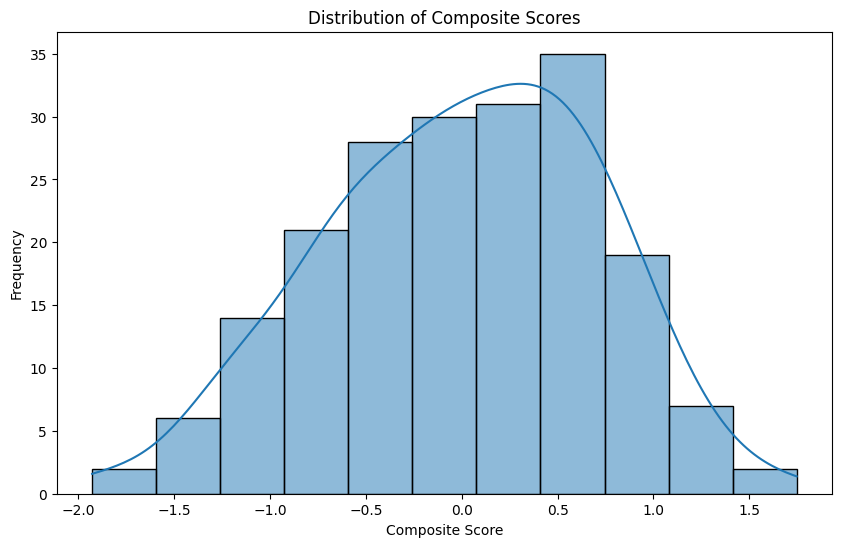

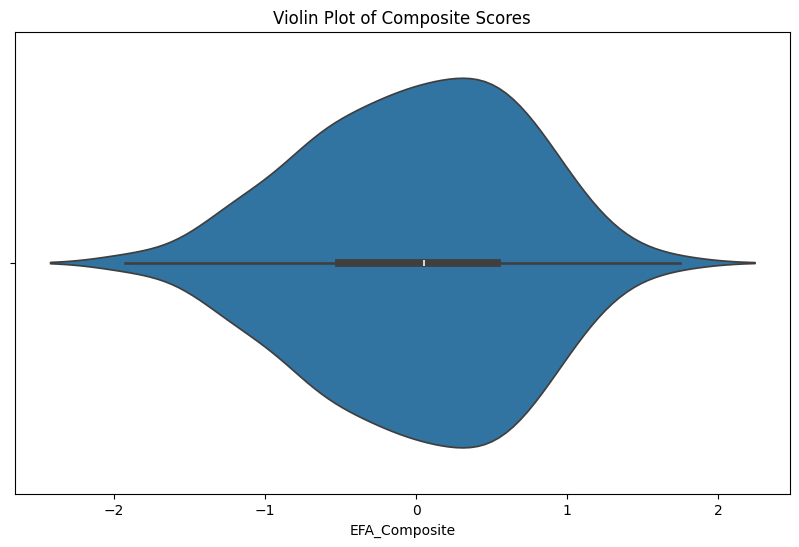

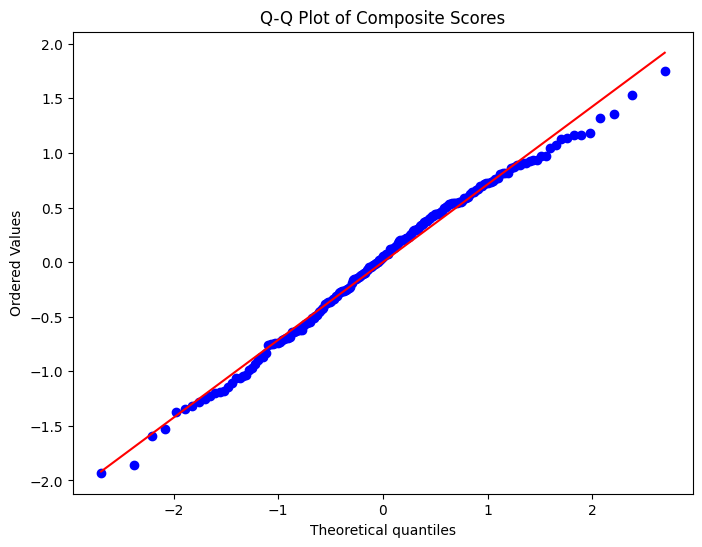

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame from the previous code is available

plt.figure(figsize=(10, 6))
sns.histplot(data['EFA_Composite'], kde=True)
plt.title('Distribution of Composite Scores')
plt.xlabel('Composite Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10,6))
sns.violinplot(x=data['EFA_Composite'])
plt.title('Violin Plot of Composite Scores')
plt.show()

# Quantile-Quantile (QQ) plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(data['EFA_Composite'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Composite Scores')
plt.show()


## Individual Factor Ratings, applied q-cut, Weighted Score (weigh assignment based on Eigen Value Variance / Importance) and overall Rating

In [10]:
# # After computing factor scores
# factor_scores_df = pd.DataFrame(
#     factor_scores,
#     columns=[f'Factor_{i+1}' for i in range(n_factors)]
# )

# # Add identifier and date information
# factor_scores_df['identifier_vendorcustomer_name'] = data['identifier_vendorcustomer_name'].values
# factor_scores_df['FirstDateofMonth'] = data['FirstDateofMonth'].values

# # Method 1: Use quantile binning to create a 0-5 scale for each factor
# # Create 6 bins (0, 1, 2, 3, 4, 5)
# num_bins = 6
# bin_labels = list(range(num_bins))

# for i in range(n_factors):
#     factor_name = f'Factor_{i+1}'
#     # Use qcut to create quantile-based bins and map to 0-5 scale
#     factor_scores_df[f'{factor_name}_Rating'] = pd.qcut(
#         factor_scores_df[factor_name],
#         q=num_bins,
#         labels=bin_labels
#     ).astype(float)

# # Method 2: Create a weighted score first, then apply quantile binning
# # Calculate weighted score using eigenvalues
# eigenvalue_sum = sum(eigen_values[:n_factors])
# factor_weights = [ev/eigenvalue_sum for ev in eigen_values[:n_factors]]

# weighted_score = sum(factor_scores_df[f'Factor_{i+1}'] * factor_weights[i]
#                      for i in range(n_factors))
# factor_scores_df['Weighted_Score'] = weighted_score

# # Apply quantile binning to create a 0-5 scale for the weighted score
# factor_scores_df['Overall_Rating'] = pd.qcut(
#     factor_scores_df['Weighted_Score'],
#     q=num_bins,
#     labels=bin_labels
# ).astype(float)

# # Display sample output
# print(factor_scores_df[['FirstDateofMonth', 'identifier_vendorcustomer_name',
#                        'Factor_1', 'Factor_1_Rating', 'Factor_2', 'Factor_2_Rating',
#                        'Weighted_Score', 'Overall_Rating']].head())


# # # Merge ratings back to original data if needed
# # data_rank = data.merge(factor_scores_df[[
# #     'identifier_vendorcustomer_name', 'FirstDateofMonth', 'Overall_Rating'
# # ]], on=['identifier_vendorcustomer_name', 'FirstDateofMonth'])

In [11]:
# After computing factor scores
factor_scores_df = pd.DataFrame(
    factor_scores,
    columns=[f'Factor_{i+1}' for i in range(n_factors)]
)

# Add identifier and date information
factor_scores_df['ClientName'] = data['ClientName'].values
factor_scores_df['ReportMonth'] = data['ReportMonth'].values

# Method 1: Use quantile binning to create a 1-5 scale for each factor
num_ranks = 5
bin_labels = list(range(1, num_ranks + 1))  # 1, 2, 3, 4, 5

for i in range(n_factors):
    factor_name = f'Factor_{i+1}'
    # Use qcut to create quantile-based bins and map to 1-5 scale
    factor_scores_df[f'{factor_name}_Rating'] = pd.qcut(
        factor_scores_df[factor_name],
        q=num_ranks,
        labels=bin_labels
    ).astype(float)

# Method 2: Create an equally weighted score, then apply quantile binning
# Calculate equal-weighted score (simple average of factors)
factor_scores_df['Equal_Weighted_Score'] = factor_scores_df[[f'Factor_{i+1}' for i in range(n_factors)]].mean(axis=1)

# Apply quantile binning to create a 1-5 scale for the equal-weighted score
factor_scores_df['Overall_Rating'] = pd.qcut(
    factor_scores_df['Equal_Weighted_Score'],
    q=num_ranks,
    labels=bin_labels
).astype(float)

# Display sample output
print(factor_scores_df[['ReportMonth', 'ClientName',
                       'Factor_1', 'Factor_1_Rating', 'Factor_2', 'Factor_2_Rating',
                       'Equal_Weighted_Score', 'Overall_Rating']].head())


# # Merge ratings back to original data if needed
# data_rank = data.merge(factor_scores_df[[
#     'identifier_vendorcustomer_name', 'FirstDateofMonth', 'Overall_Rating'
# ]], on=['identifier_vendorcustomer_name', 'FirstDateofMonth'])

  ReportMonth         ClientName  Factor_1  Factor_1_Rating  Factor_2  \
0  2023-01-09  Theta Enterprises -1.576991              1.0 -0.214666   
1  2024-01-01         Zeta Group  0.525097              4.0  0.160877   
2  2024-01-04        Epsilon Ltd  0.492007              4.0  1.322722   
3  2023-01-08      Iota Partners -0.806457              2.0  0.342199   
4  2024-01-09           Beta LLC  0.222261              3.0 -1.316323   

   Factor_2_Rating  Equal_Weighted_Score  Overall_Rating  
0              2.0             -0.895829             1.0  
1              3.0              0.342987             4.0  
2              5.0              0.907365             5.0  
3              3.0             -0.232129             2.0  
4              1.0             -0.547031             2.0  


In [12]:
factor_scores_df.to_csv('efa_rankings.csv', index=False)

In [14]:
# Load the datasets
efa_ranks = pd.read_csv('efa_ranks.csv')
efa_rankings = pd.read_csv('efa_rankings.csv')

# Select columns from efa_ranks
selected_columns = ['ReportMonth', 'ClientName', 'EFA_Composite', 'EFA_Percentile_Rank', 'EFA_Equal_Size_Rank', 'EFA_Custom_Cut_Rank']
new_df = efa_ranks[selected_columns].copy()

# Merge 'Overall_Rating' from efa_rankings
new_df = pd.merge(new_df, efa_rankings[['ClientName', 'ReportMonth', 'Overall_Rating']],
                   on=['ClientName', 'ReportMonth'], how='left')

print(new_df.head())


  ReportMonth         ClientName  EFA_Composite  EFA_Percentile_Rank  \
0  2023-01-09  Theta Enterprises      -0.895829                  1.0   
1  2023-01-09  Theta Enterprises      -0.895829                  1.0   
2  2023-01-09  Theta Enterprises      -0.895829                  1.0   
3  2024-01-01         Zeta Group       0.342987                  4.0   
4  2024-01-01         Zeta Group       0.342987                  4.0   

   EFA_Equal_Size_Rank  EFA_Custom_Cut_Rank  Overall_Rating  
0                  1.0                  2.0             1.0  
1                  1.0                  2.0             3.0  
2                  1.0                  2.0             1.0  
3                  4.0                  4.0             4.0  
4                  4.0                  4.0             3.0  


In [15]:
new_df.to_csv('efa_rankings_merged.csv', index=False)